In [28]:
import torch
import os
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [29]:

def ANN(x,y):
    ANNreg = nn.Sequential(nn.Linear(1,1), nn.ReLU(), nn.Linear(1,1))
    learningRate = 0.05
    lossFun = nn.MSELoss()
    optimiser = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)
    epochs =200
    losses = torch.zeros(epochs)
    for epochi in range(epochs):
        yHat = ANNreg(x)
        loss = lossFun(yHat, y)
        losses[epochi] = loss
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    predictions = ANNreg(x)
    return predictions, losses

In [30]:
def dataGen(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N,1)/2
    return x,y


In [31]:
slopes = np.linspace(-2, 2, 21)
results = np.zeros((len(slopes), 50, 2))
for i in range(len(slopes)):
    for N in range(50):
        x,y = dataGen(slopes[i])
        yHat , losses = ANN(x,y)
        results[i, N, 0] = losses[-1]
        results[i, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0,1]

results[np.isnan(results)] = 0

c:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


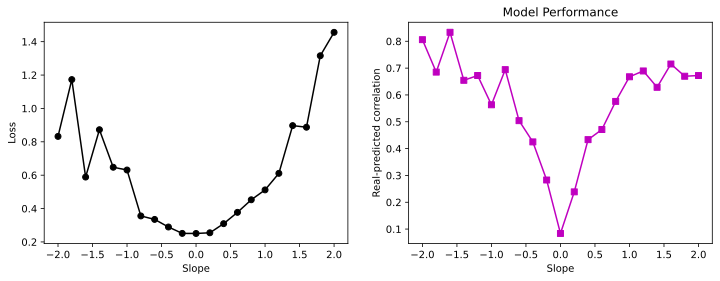

In [32]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(slopes, np.mean(results[:,:,0], axis = 1), "ko-")
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')

ax[1].plot(slopes, np.mean(results[:,:,1], axis = 1), "ms-")
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model Performance')

plt.show()